<img src="Titulo2.png" alt="Título" width="100%" height="auto">

# <span style="color:darkblue">Resumen</span>

En este proyecto se analizan los datos del número de contagios por COVID-19 en México durante el año 2022, se observan las entidades con mayores contagios así como el número de muertes y supervivencia de los contagiados.

# <span style="color:darkblue">Herramientas</span>

* Python
    1. siuba 
    2. siuba.dply.vector 
    3. plotnine
    4. pandas y numpy.

# <span style="color:darkblue">Introducción</span>

El COVID-19, causado por el coronavirus SARS-CoV-2, es una enfermedad respiratoria que se identificó por primera vez en Wuhan, China, en diciembre de 2019. La enfermedad se propagó rápidamente a nivel mundial, provocando una pandemia. Los síntomas varían desde leves, como fiebre y tos, hasta graves, incluyendo dificultad para respirar y fallo multiorgánico. Las medidas para controlar la propagación incluyeron cuarentenas, distanciamiento social, uso de mascarillas y vacunación masiva. La pandemia tuvo un impacto significativo en la salud pública, la economía y las rutinas diarias de las personas en todo el mundo. 

En la sección data se encuentra un archivo llamado datos_covid.txt, el cual contiene un enlace para descargar la tabla de datos de COVID19 del año 2022 en México.

En ella, entre otras cosas, se encuentran las columnas <code>ENTIDAD_RES</code>, <code>SEXO</code>, <code>FECHA_SINTOMAS</code>, <code>FECHA_DEF</code>, <code>EDAD</code> y <code>CLASIFICACION_FINAL</code> que se describen a continuación:

<code>ENTIDAD_RES</code> Entidad de residencia de la persona. Se representa por los números 1, 2, 3, ..., 32.\
<code>SEXO</code> Sexo de la persona: 1 para mujer y 2 para hombre.\
<code>FECHA_SINTOMAS</code> Identifica la fecha en que inició la sintomatología de la persona.\
<code>FECHA_DEF</code> Identifica la fecha en que el paciente falleció. Es una columna de tipo string y toma el valor '9999-99-99' si el paciente no falleció.\
<code>EDAD</code> Edad del paciente.\
<code>CLASIFICACION_FINAL</code> Identifica si el paciente es un caso de COVID-19. Es una columna numérica y toma el valor 1, 2 o 3 en caso de ser positivo.

En la sección data del repositorio también se encuentra un csv llamado catalogo_entidades.csv. Este csv tiene tres columnas con la siguiente información: 

<code>ENTIDAD_RES</code> Entidad de residencia de la persona. Se representa por los números 1, 2, 3, ..., 32.\
<code>ENTIDAD_FEDERATIVA</code> es el nombre completo de las entidades.\
<code>ENTIDAD_ABREVIATURA</code> es la abreviatura del nombre de las entidades.

# <span style="color:darkblue">Preprocesamiento de datos</span>

Realizamos la importación de librerías necesarias

In [1]:
import pandas as pd             # Para importar pandas 
import numpy as np              # Para importar numpy 
import plotnine as p9
from plotnine import *          # Para importar plotnine
from siuba import *             # Para importar siuba
from siuba.dply.vector import * # Para importar algunas funciones necesarias

Realizamos la lectura del archivo

In [2]:
# Leemos el archivo de datos
#data = pd.read_csv("C:\\Users\\Martin\\OneDrive\\Documentos\\Python Scripts\\221227COVID19MEXICO.csv")
data = pd.read_csv("221227COVID19MEXICO.csv")

C:\Users\marti\AppData\Local\Temp\ipykernel_2080\10088265.py:3: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.


In [4]:
data

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2022-12-27,10e0db,1,12,20,2,20,20,67,1,...,1,2,97,1,2,7,99,México,97,97
1,2022-12-27,0989f5,2,12,14,1,32,14,71,1,...,2,2,97,1,1,3,99,México,97,97
2,2022-12-27,01e27d,2,9,25,2,25,25,1,1,...,2,2,97,1,2,7,99,México,97,97
3,2022-12-27,180725,2,9,9,2,9,9,12,2,...,2,2,97,1,2,7,99,México,97,2
4,2022-12-27,0793b8,2,12,9,2,9,9,10,1,...,2,2,97,1,2,7,99,México,97,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330961,2022-12-27,m07fc81,2,12,15,2,15,15,999,1,...,99,1,3,2,97,6,99,México,97,97
6330962,2022-12-27,m101c2f,2,3,15,2,15,15,999,1,...,99,1,1,2,97,3,99,México,97,97
6330963,2022-12-27,m123829,2,12,15,2,15,15,999,1,...,99,1,3,2,97,6,99,México,97,97
6330964,2022-12-27,m0610a9,2,12,15,1,15,15,999,1,...,99,2,97,2,97,6,99,México,97,97


El archivo posee las siguientes 40 columnas con información

In [5]:
data.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'TOMA_MUESTRA_LAB', 'RESULTADO_LAB',
       'TOMA_MUESTRA_ANTIGENO', 'RESULTADO_ANTIGENO', 'CLASIFICACION_FINAL',
       'MIGRANTE', 'PAIS_NACIONALIDAD', 'PAIS_ORIGEN', 'UCI'],
      dtype='object')

La tabla es muy grande y en este proyecto no vamos a analizarla toda por lo cual nos quedamos únicamente con las columnas\
<code>ENTIDAD_RES</code>, <code>SEXO</code>, <code>FECHA_SINTOMAS</code>, <code>FECHA_DEF</code>, <code>EDAD</code> y <code>CLASIFICACION_FINAL</code>

In [6]:
data = data >> select(_.ENTIDAD_RES, _.SEXO, _.FECHA_SINTOMAS, _.FECHA_DEF, _.EDAD, _.CLASIFICACION_FINAL)
data

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL
0,20,2,2022-06-21,9999-99-99,28,7
1,14,1,2022-08-06,9999-99-99,57,3
2,25,2,2022-02-14,9999-99-99,81,7
3,9,2,2022-01-17,9999-99-99,33,7
4,9,2,2022-05-03,9999-99-99,43,7
...,...,...,...,...,...,...
6330961,15,2,2022-12-22,9999-99-99,54,6
6330962,15,2,2022-12-22,9999-99-99,39,3
6330963,15,2,2022-12-22,9999-99-99,21,6
6330964,15,1,2022-12-23,9999-99-99,37,6


Creamos una tabla llamada covid_confirmados donde se encuentran todos los pacientes que hayan dado positivo al virus. A partir de ahora y hasta el final trabajaremos con esta tabla.

In [7]:
covid_confirmados = data >> filter((_.CLASIFICACION_FINAL == 1) | (_.CLASIFICACION_FINAL == 2) | (_.CLASIFICACION_FINAL == 3))
covid_confirmados

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL
1,14,1,2022-08-06,9999-99-99,57,3
13,22,1,2022-01-24,9999-99-99,34,3
15,22,1,2022-07-20,9999-99-99,54,3
19,18,1,2022-02-05,9999-99-99,24,3
22,9,2,2022-02-13,2022-02-21,54,2
...,...,...,...,...,...,...
6330898,15,2,2022-12-19,9999-99-99,0,3
6330902,15,2,2022-12-19,9999-99-99,64,3
6330913,15,1,2022-12-20,9999-99-99,40,3
6330918,15,1,2022-12-21,9999-99-99,70,3


Vamos a crear una columna llamada FALLECIMIENTO que valga 0 si el paciente no falleció y 1 si el paciente falleció, y vamos a cambiar cada valor "9999-99-99" de la columna FECHA_DEF por None 

In [ ]:
#covid_confirmados = covid_confirmados >> mutate(FALLECIMIENTO = np.where(_.FECHA_DEF == "9999-99-99",0,1))
#covid_confirmados

In [8]:
covid_confirmados['FALLECIMIENTO'] = np.where(covid_confirmados['FECHA_DEF'] == "9999-99-99", 0, 1)
covid_confirmados

C:\Users\marti\AppData\Local\Temp\ipykernel_2080\418316182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO
1,14,1,2022-08-06,9999-99-99,57,3,0
13,22,1,2022-01-24,9999-99-99,34,3,0
15,22,1,2022-07-20,9999-99-99,54,3,0
19,18,1,2022-02-05,9999-99-99,24,3,0
22,9,2,2022-02-13,2022-02-21,54,2,1
...,...,...,...,...,...,...,...
6330898,15,2,2022-12-19,9999-99-99,0,3,0
6330902,15,2,2022-12-19,9999-99-99,64,3,0
6330913,15,1,2022-12-20,9999-99-99,40,3,0
6330918,15,1,2022-12-21,9999-99-99,70,3,0


In [ ]:
#covid_confirmados = covid_confirmados >> mutate(FECHA_DEF = np.where(_.FECHA_DEF == "9999-99-99",None))
#covid_confirmados

In [9]:
covid_confirmados['FECHA_DEF'] = covid_confirmados['FECHA_DEF'].where(covid_confirmados['FECHA_DEF'] != '9999-99-99', None)
covid_confirmados

C:\Users\marti\AppData\Local\Temp\ipykernel_2080\3796729531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO
1,14,1,2022-08-06,None,57,3,0
13,22,1,2022-01-24,None,34,3,0
15,22,1,2022-07-20,None,54,3,0
19,18,1,2022-02-05,None,24,3,0
22,9,2,2022-02-13,2022-02-21,54,2,1
...,...,...,...,...,...,...,...
6330898,15,2,2022-12-19,None,0,3,0
6330902,15,2,2022-12-19,None,64,3,0
6330913,15,1,2022-12-20,None,40,3,0
6330918,15,1,2022-12-21,None,70,3,0


Convertimos los datos <code>FECHAS_SINTOMAS</code> y <code>FECHA_DEF</code> a tipo fecha

In [10]:
covid_confirmados = covid_confirmados >> mutate(FECHA_SINTOMAS = _.FECHA_SINTOMAS.astype("datetime64[ns]"), FECHA_DEF = _.FECHA_DEF.astype("datetime64[ns]"))
covid_confirmados

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO
1,14,1,2022-08-06,NaT,57,3,0
13,22,1,2022-01-24,NaT,34,3,0
15,22,1,2022-07-20,NaT,54,3,0
19,18,1,2022-02-05,NaT,24,3,0
22,9,2,2022-02-13,2022-02-21,54,2,1
...,...,...,...,...,...,...,...
6330898,15,2,2022-12-19,NaT,0,3,0
6330902,15,2,2022-12-19,NaT,64,3,0
6330913,15,1,2022-12-20,NaT,40,3,0
6330918,15,1,2022-12-21,NaT,70,3,0


Encontramos la menor y mayor fecha de la columna <code>FECHA_SINTOMAS</code> para ello utilizamos arrange.

In [11]:
covid_confirmados >> arrange(_.FECHA_SINTOMAS)

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO
41,9,1,2022-01-01,NaT,37,3,0
106,32,2,2022-01-01,NaT,12,3,0
469,9,2,2022-01-01,NaT,30,3,0
626,2,2,2022-01-01,NaT,51,1,0
760,5,1,2022-01-01,NaT,27,3,0
...,...,...,...,...,...,...,...
6265641,2,1,2022-12-26,NaT,23,3,0
6265673,28,2,2022-12-26,NaT,26,3,0
6265677,2,2,2022-12-26,NaT,30,3,0
6265680,2,1,2022-12-26,NaT,28,3,0


# <span style="color:darkblue">Análisis de datos</span>

Vamos a ver en el periodo de fechas que comprende la tabla covid_confirmados, ¿cuántos contagiados hubo?. Para ello utilizamos summarize

In [12]:
n_con = covid_confirmados >> summarize(total_de_contagios = n(_))
n_con

,total_de_contagios
0,3138715


Nos preguntamos además ¿Cuántas muertes hubo en ese periodo de tiempo? ¿qué porcentaje representa el total de muertes respecto del total de enfermos?

In [13]:
covid_confirmados >> filter(_.FALLECIMIENTO == 1) >> summarize(total_de_fallecidos = _.FALLECIMIENTO.sum(), porcentaje =(_.FALLECIMIENTO.sum()/float(n_con.iloc[0]))*100)

,total_de_fallecidos,porcentaje
0,25188,0.802494


Vamos a llevar toda la información del archivo catalogo_entidades.csv hacia nuestra tabla covid_confirmados, de modo que en covid_confirmados tengamos las columnas de las abreviaciones y nombres de cada entidad, esto lo hacemos mediante un join.

In [14]:
# Leemos el archivo de datos tomando en cuenta los acentos
#data = pd.read_csv("C:\\Users\\Martin\\OneDrive\\Documentos\\Python Scripts\\catalogo_entidades.csv")
entidades = pd.read_csv("catalogo_entidades.csv", encoding="latin-1")
entidades

,ENTIDAD_RES,ENTIDAD_FEDERATIVA,ENTIDAD_ABREVIATURA
0,1,Aguascalientes,AS
1,2,Baja California,BC
2,3,Baja California Sur,BS
3,4,Campeche,CC
4,5,Coahuila De Zaragoza,CL
5,6,Colima,CM
6,7,Chiapas,CS
7,8,Chihuahua,CH
8,9,Ciudad De México,DF
9,10,Durango,DG


In [15]:
covid_confirmados = left_join(covid_confirmados, entidades, on="ENTIDAD_RES")
covid_confirmados

,ENTIDAD_RES,SEXO,FECHA_SINTOMAS,FECHA_DEF,EDAD,CLASIFICACION_FINAL,FALLECIMIENTO,ENTIDAD_FEDERATIVA,ENTIDAD_ABREVIATURA
0,14,1,2022-08-06,NaT,57,3,0,Jalisco,JC
1,22,1,2022-01-24,NaT,34,3,0,Querétaro,QT
2,22,1,2022-07-20,NaT,54,3,0,Querétaro,QT
3,18,1,2022-02-05,NaT,24,3,0,Nayarit,NT
4,9,2,2022-02-13,2022-02-21,54,2,1,Ciudad De México,DF
...,...,...,...,...,...,...,...,...,...
3138710,15,2,2022-12-19,NaT,0,3,0,México,MC
3138711,15,2,2022-12-19,NaT,64,3,0,México,MC
3138712,15,1,2022-12-20,NaT,40,3,0,México,MC
3138713,15,1,2022-12-21,NaT,70,3,0,México,MC


Obténgamos una tabla, la cual muestra las 10 entidades con más contagios ordenadas de mayor a menor, con el número de contagios y el lugar de la Entidad (1 para la de mas contagios y 10 para la décima con mas contagios)

In [16]:
consulta = covid_confirmados >> group_by(_.ENTIDAD_FEDERATIVA) >> summarize(TOTAL = n(_))  #Se cuenta el total de contagios
consulta = consulta >> arrange(-_.TOTAL) >> mutate(Lugar = row_number)>>select(_.Lugar, _.ENTIDAD_FEDERATIVA, _.TOTAL) >> head(10) # La posición
consulta = consulta.style.set_table_styles(
    [{'selector': 'th',
      'props': [('text-align', 'center')]},
     {'selector': 'td',
      'props': [('text-align', 'center')]}]
) # Damos formato a la tabla
consulta

,Lugar,ENTIDAD_FEDERATIVA,TOTAL
6,1,Ciudad De México,760028
16,2,México,285278
18,3,Nuevo León,188467
10,4,Guanajuato,148406
23,5,San Luis Potosí,133254
13,6,Jalisco,119313
29,7,Veracruz De Ignacio De La Llave,101444
24,8,Sinaloa,101123
5,9,Chihuahua,85739
20,10,Puebla,83482


Obténgamos ahora una tabla que muestre las 10 entidades con más muertes ordenadas de mayor a menor, con el número de muertes y el lugar de la Entidad (1 para la de mas muertes y 10 para la décima con mas muertes)

In [17]:
consulta = covid_confirmados >> filter(_.FALLECIMIENTO == 1) >> group_by(_.ENTIDAD_FEDERATIVA) >> summarize(TOTAL = n)  #Se cuenta el total de contagios
consulta = consulta >> arrange(-_.TOTAL) >> mutate(Lugar = row_number)>>select(_.Lugar, _.ENTIDAD_FEDERATIVA, _.TOTAL) # La posición
consulta = head(consulta, 10) #Mostramos las primeras 10 entradas
consulta = consulta.style.set_table_styles(
    [{'selector': 'th',
      'props': [('text-align', 'center')]},
     {'selector': 'td',
      'props': [('text-align', 'center')]}]
) # Damos formato a la tabla
consulta

,Lugar,ENTIDAD_FEDERATIVA,TOTAL
6,1,Ciudad De México,2827
16,2,México,2434
13,3,Jalisco,2008
18,4,Nuevo León,1525
10,5,Guanajuato,1312
29,6,Veracruz De Ignacio De La Llave,1174
5,7,Chihuahua,1050
27,8,Tamaulipas,1037
7,9,Coahuila De Zaragoza,992
1,10,Baja California,954


Al observar ambas tablas podemos observar que la mayoría de las personas contagiadas por COVID-19 en 2022 sobrevivieron.

# <span style="color:darkblue">Gráficas</span>

Vamos a realizar un gráfico de barras donde se represente el total de contagiados en cada entidad.

In [22]:
consulta2 = covid_confirmados >> group_by(_.ENTIDAD_ABREVIATURA) >> summarize(TOTAL = n)

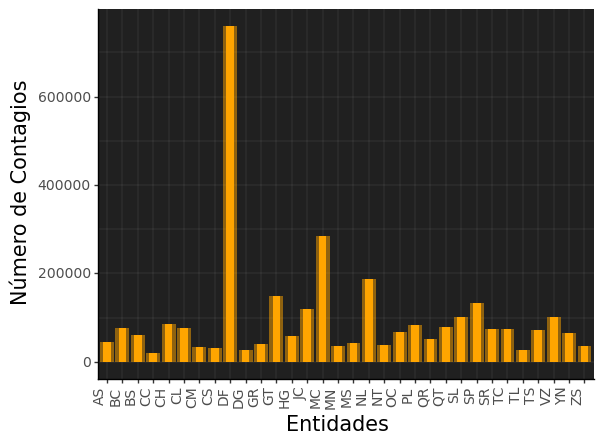

<ggplot: (144782598705)>

In [59]:
FIGURA1 = (ggplot() +    
               geom_col(data = consulta2, 
                        mapping = aes(x="ENTIDAD_ABREVIATURA", y="TOTAL"),
                        fill = "orange", alpha = 0.5) + 
           geom_col(data = consulta2, 
                        mapping = aes(x="ENTIDAD_ABREVIATURA", y="TOTAL"),
                        fill = "orange", width = 0.5)
                        + p9.labels.xlab('Entidades')
                        + p9.labels.ylab('Número de Contagios')
                        + theme(
                            panel_background = element_rect("#202020"),
                            panel_grid = element_line(color = "darkgrey", size = 0.1),
                            axis_line=element_line(size=1),
                            axis_text=element_text(size=10),
                            axis_title_y=element_text(size=15),
                            axis_title_x=element_text(size=15),
                            axis_text_x=element_text(angle=90, hjust=1)))
FIGURA1

Vamos a realizar un gráfico de barras donde se represente el total de contagiados en cada entidad segregados por sexo.

In [44]:
consulta3 = covid_confirmados >> mutate(SEXO = np.where(_.SEXO == 1, 'MUJER', 'HOMBRE')) >> group_by(_.ENTIDAD_ABREVIATURA, _.SEXO) >> summarize(TOTAL = n)
consulta3

,ENTIDAD_ABREVIATURA,SEXO,TOTAL
0,AS,HOMBRE,19593
1,AS,MUJER,26055
2,BC,HOMBRE,31851
3,BC,MUJER,43664
4,BS,HOMBRE,27534
...,...,...,...
59,VZ,MUJER,57243
60,YN,HOMBRE,30291
61,YN,MUJER,34420
62,ZS,HOMBRE,15744


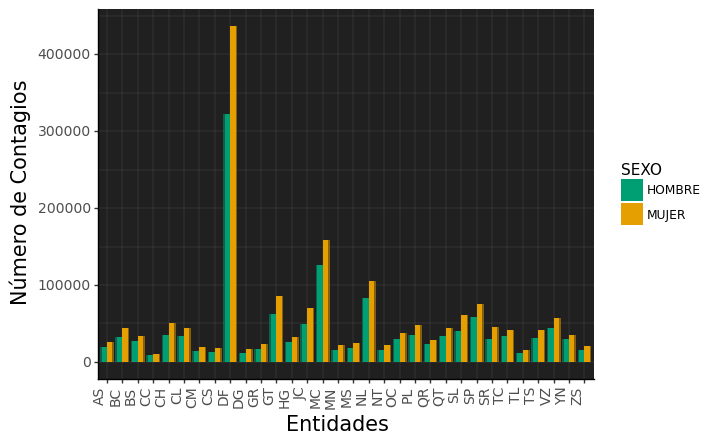

<ggplot: (144782370570)>

In [61]:
FIGURA2 = (ggplot() +    
               geom_col(data = consulta3, 
                        mapping = aes(x="ENTIDAD_ABREVIATURA", y="TOTAL", fill = "SEXO"), position = "dodge", alpha = 0.5) + 
           geom_col(data = consulta3, 
                        mapping = aes(x="ENTIDAD_ABREVIATURA", y="TOTAL", fill = "SEXO"), position = "dodge", width = 0.7)
                        + p9.labels.xlab('Entidades')
                        + p9.labels.ylab('Número de Contagios')
                        + scale_fill_manual(values = ["#009E73","#E69F00"])
                        + theme(
                            panel_background = element_rect("#202020"),
                            panel_grid = element_line(color = "darkgrey", size = 0.1),
                            axis_line=element_line(size=1),
                            axis_text=element_text(size=10),
                            axis_title_y=element_text(size=15),
                            axis_title_x=element_text(size=15),
                            axis_text_x=element_text(angle=90, hjust=1)))
FIGURA2

Vamos a realizar un gráfico de líneas donde se represente el total de contagiados diariamente. 

In [50]:
consulta4 = covid_confirmados >> group_by(_.FECHA_SINTOMAS) >> summarize(TOTAL = n)
consulta4

,FECHA_SINTOMAS,TOTAL
0,2022-01-01,27252
1,2022-01-02,28013
2,2022-01-03,42382
3,2022-01-04,37308
4,2022-01-05,40521
...,...,...
355,2022-12-22,2388
356,2022-12-23,1340
357,2022-12-24,895
358,2022-12-25,625


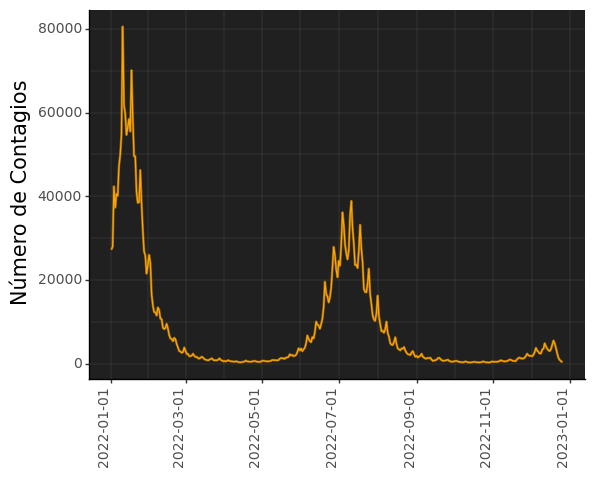

<ggplot: (144782448770)>

In [58]:
FIGURA3 = (ggplot() +    
               geom_line(data = consulta4, 
                        mapping = aes(x="FECHA_SINTOMAS", y="TOTAL"),
                        color = "orange", alpha = 0.5, size = 1) + 
              geom_line(data = consulta4, 
                        mapping = aes(x="FECHA_SINTOMAS", y="TOTAL"),
                        color = "orange", size = 0.5)
                        + p9.labels.xlab('')
                        + p9.labels.ylab('Número de Contagios')
                        + theme(
                            panel_background = element_rect("#202020"),
                            panel_grid = element_line(color = "darkgrey", size = 0.1),
                            axis_line=element_line(size=1),
                            axis_text=element_text(size=10),
                            axis_title_y=element_text(size=15),
                            axis_title_x=element_text(size=10),
                            axis_text_x=element_text(angle=90, hjust=1)))
FIGURA3

Vamos a realizar un gráfico de líneas donde se represente el total de muertes diariamente.

In [66]:
consulta5 = covid_confirmados >> filter(_.FALLECIMIENTO == 1) >> group_by(_.FECHA_DEF) >> summarize(TOTAL = n)
consulta5

,FECHA_DEF,TOTAL
0,2022-01-01,1
1,2022-01-03,13
2,2022-01-04,16
3,2022-01-05,30
4,2022-01-06,35
...,...,...
351,2022-12-22,16
352,2022-12-23,14
353,2022-12-24,8
354,2022-12-25,14


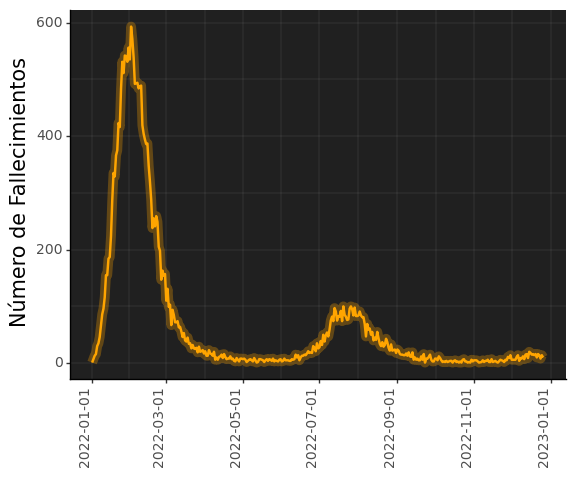

<ggplot: (144782793180)>

In [87]:
FIGURA4 = (ggplot() +    
               geom_line(data = consulta5, 
                        mapping = aes(x="FECHA_DEF", y="TOTAL"),
                        color = "orange", alpha = 0.3, size = 4) + 
               geom_line(data = consulta5, 
                        mapping = aes(x="FECHA_DEF", y="TOTAL"),
                        color = "orange", size = 1)
                        + p9.labels.xlab('')
                        + p9.labels.ylab('Número de Fallecimientos')
                        + theme(
                            panel_background = element_rect("#202020"),
                            panel_grid = element_line(color = "darkgrey", size = 0.1),
                            axis_line=element_line(size=1),
                            axis_text=element_text(size=10),
                            axis_title_y=element_text(size=15),
                            axis_title_x=element_text(size=10),
                            axis_text_x=element_text(angle=90, hjust=1)))
FIGURA4

Vamos a realizar un gráfico de líneas donde se represente el total de muertes acumuladas diariamente. 

In [67]:
consulta6 = consulta5 >> mutate(suma_acumulada = _.TOTAL.cumsum())
consulta6

,FECHA_DEF,TOTAL,suma_acumulada
0,2022-01-01,1,1
1,2022-01-03,13,14
2,2022-01-04,16,30
3,2022-01-05,30,60
4,2022-01-06,35,95
...,...,...,...
351,2022-12-22,16,25142
352,2022-12-23,14,25156
353,2022-12-24,8,25164
354,2022-12-25,14,25178


Vamos a realizar un gráfico de líneas donde se represente tanto el total de muertes como el total de muertes acumuladas diariamente. Es decir, un gráfico que muestre las dos curvas anteriores.

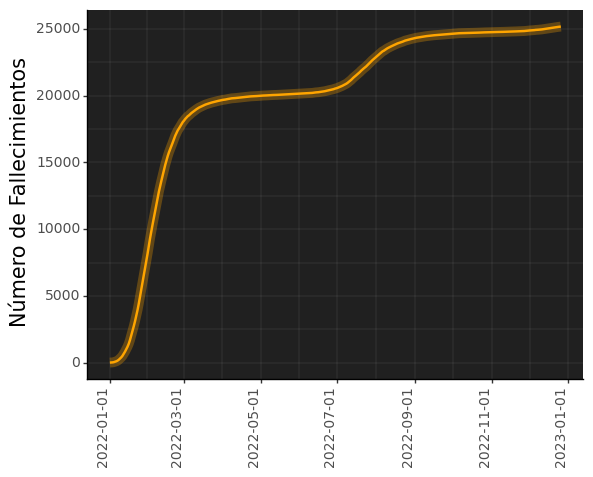

<ggplot: (144807756505)>

In [89]:
FIGURA5 = (ggplot() +    
               geom_line(data = consulta6, 
                        mapping = aes(x="FECHA_DEF", y="suma_acumulada"),
                        color = "orange", alpha = 0.3, size = 4) + 
               geom_line(data = consulta6, 
                        mapping = aes(x="FECHA_DEF", y="suma_acumulada"),
                        color = "orange", size = 1)
                        + p9.labels.xlab('')
                        + p9.labels.ylab('Número de Fallecimientos')
                        + theme(
                            panel_background = element_rect("#202020"),
                            panel_grid = element_line(color = "darkgrey", size = 0.1),
                            axis_line=element_line(size=1),
                            axis_text=element_text(size=10),
                            axis_title_y=element_text(size=15),
                            axis_title_x=element_text(size=10),
                            axis_text_x=element_text(angle=90, hjust=1)))
FIGURA5

Vamos a calcular el total de contagiados en cada uno de los estados de la Republica Méxicana en un mapa de color

In [90]:
mapa_mexico = pd.read_csv("Mexico_division_politica.csv", encoding='latin-1') #Mapa de Mexico

In [96]:
mapa_mexico = mapa_mexico >> mutate(ENTIDAD_RES = _.Grupo.astype("int"))

In [102]:
tabla1 = covid_confirmados >> group_by(_.ENTIDAD_RES) >> summarize(Contagios = n)
tabla1

,ENTIDAD_RES,Contagios
0,1,45648
1,2,75515
2,3,60561
3,4,19397
4,5,77294
5,6,34294
6,7,30289
7,8,85739
8,9,760028
9,10,27906


In [104]:
tabla2 = covid_confirmados >> filter(_.FALLECIMIENTO == 1) >> group_by(_.ENTIDAD_RES) >> summarize(Defunciones = n)
tabla2 

,ENTIDAD_RES,Defunciones
0,1,409
1,2,954
2,3,290
3,4,153
4,5,992
5,6,201
6,7,130
7,8,1050
8,9,2827
9,10,376


Unimos las tablas hacia el Dataframe mapa_mexico y lo llamamos mapa_final

In [107]:
mapa_final = left_join(mapa_mexico, tabla1, on="ENTIDAD_RES")
mapa_final = left_join(mapa_final, tabla2, on="ENTIDAD_RES")
mapa_final

,Longitud,Latitud,Grupo,ENTIDAD_RES,Contagios,Defunciones
0,-102.266047,22.403721,1.1,1,45648,409
1,-102.264885,22.400197,1.1,1,45648,409
2,-102.250299,22.387222,1.1,1,45648,409
3,-102.252053,22.374353,1.1,1,45648,409
4,-102.228133,22.374681,1.1,1,45648,409
...,...,...,...,...,...,...
65177,-101.609012,24.789664,32.1,32,36435,420
65178,-101.640767,24.800704,32.1,32,36435,420
65179,-101.622270,24.758983,32.1,32,36435,420
65180,-101.600407,24.754397,32.1,32,36435,420


Graficamos el total de contagiados, se observa que la CDMX fue el lugar de mayores contagios durante la pandemia.

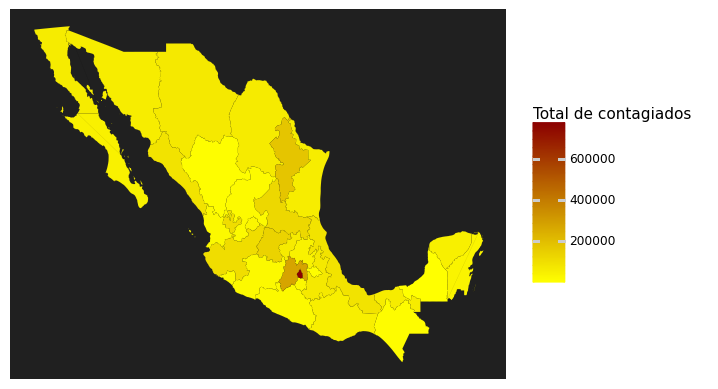

<ggplot: (144826213813)>

In [110]:
(ggplot() +      
 geom_polygon(data = mapa_final, 
              mapping = aes(x="Longitud",y="Latitud",group="Grupo",fill="Contagios"), 
              color = "black",
              size = 0.01) 
             +scale_fill_gradient(low = "yellow",high = "darkred")
             +labs(fill="Total de contagiados") 
             +theme(panel_background = element_rect("#202020"),
              panel_grid = element_blank(),
              axis_title = element_blank(), 
              axis_text = element_blank(),
              axis_ticks = element_blank()) 
)

Graficamos por último el número de defunciones, observamos nuevamente que la CDMX fue el lugar donde hubo mayor número de decesos por COVID19, junto con Jalisco.

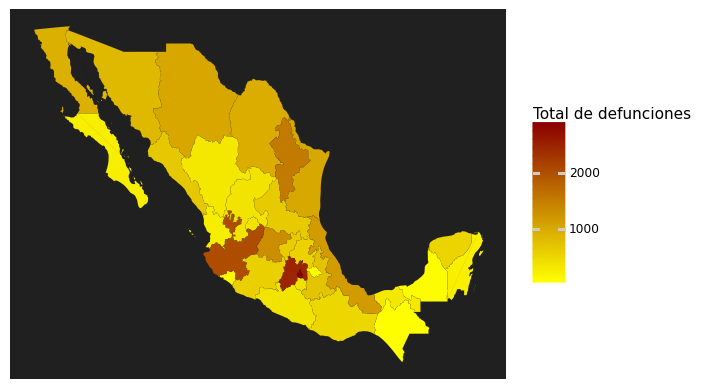

<ggplot: (144781693992)>

In [113]:
(ggplot() +
 geom_polygon(data = mapa_final,
              mapping = aes(x="Longitud",y="Latitud",group="Grupo",fill="Defunciones"),color = "black",
              size = 0.01) +
              scale_fill_gradient(low = "yellow", high = "darkred") +
              labs(fill="Total de defunciones")
              +theme(panel_background = element_rect("#202020"),
                     panel_grid = element_blank(),
                     axis_title = element_blank(),
                     axis_text = element_blank(),
                     axis_ticks = element_blank())
)